In [ ]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from keras.preprocessing import image
import keras.utils as image

In [ ]:
#! unzip /content/batch_dataset.zip

In [ ]:
gray_images = sorted(os.listdir('/content/batch_dataset/gray'))
color_images = sorted(os.listdir('/content/batch_dataset/color'))

In [ ]:
gray_image = []
for im in gray_images:
    img = image.load_img("/content/batch_dataset/gray/"+ im, target_size=(160,160), color_mode= 'rgb')
    img = image.img_to_array(img)
    img = img/255
    gray_image.append(img)
gray_image = np.array(gray_image)

In [ ]:
color_image = []
for im in color_images:
    img = image.load_img("/content/batch_dataset/color/"+ im, target_size=(160,160), color_mode= 'rgb')
    img = image.img_to_array(img)
    img = img/255
    color_image.append(img)
color_image = np.array(color_image)

In [ ]:
print(gray_image.shape)
print(color_image.shape)


(301, 160, 160, 3)
(301, 160, 160, 3)


In [ ]:
def plot_images(color,grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
   
    plt.show()

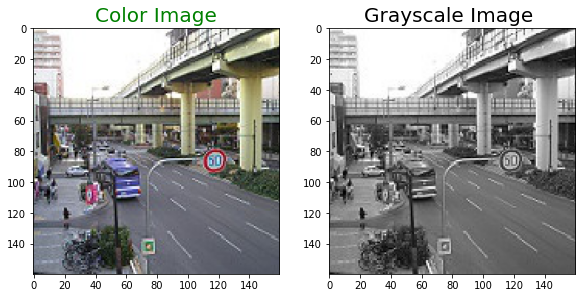

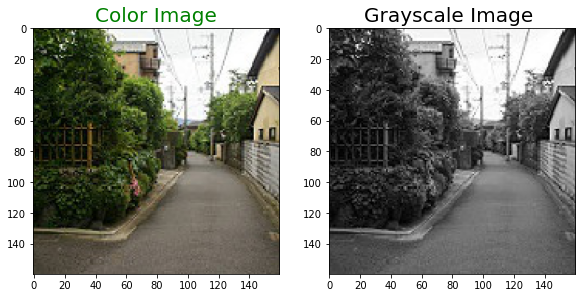

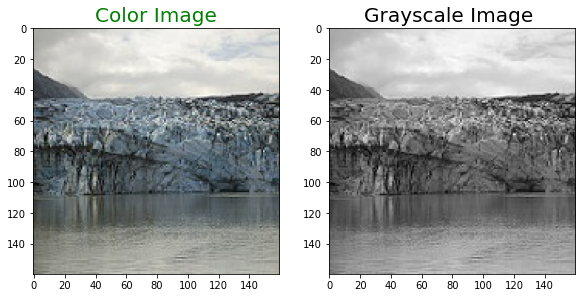

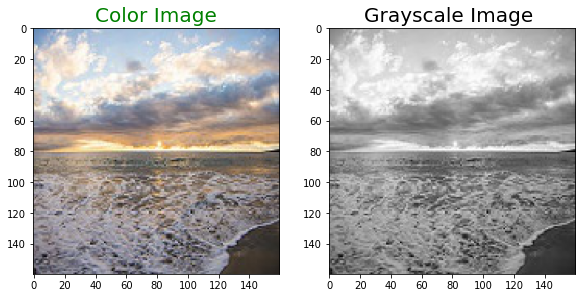

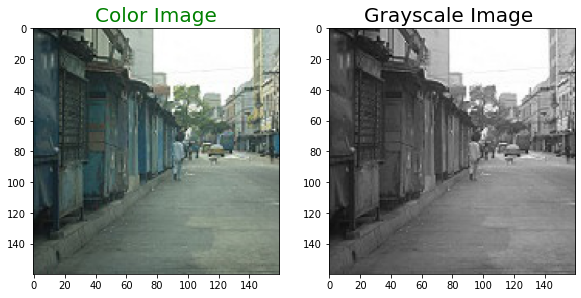

In [ ]:
for i in range(3,8):
     plot_images(color_image[i],gray_image[i])

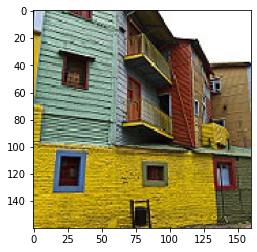

In [ ]:
plt.imshow(color_image[1])


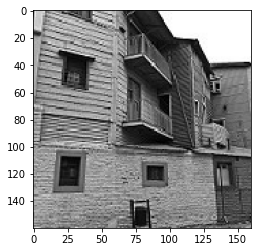

In [ ]:
plt.imshow(gray_image[1])

In [ ]:
gray_train= gray_image[0:290]
gray_test= gray_image[290:]
color_train= color_image[0:290]
color_test= color_image[290:]

In [ ]:
from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_size, dropout = True):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample

In [ ]:
def model():
    inputs = layers.Input(shape= [160,160,3])
    d1 = down(256,(3,3),True)(inputs)
    d2 = down(256,(3,3),True)(d1)
    d3 = down(256,(3,3),True)(d2)
    d4 = down(256,(3,3),True)(d3) 
    d5 = down(256,(3,3),True)(d4)
    #upsampling
    
    u1 = up(128,(3,3),False)(d5)
    u1 = layers.concatenate([u1,d4])
    u2 = up(128,(3,3),False)(u1)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),False)(u2)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),False)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3),False)(u4)
    u5 = layers.concatenate([u5,inputs])
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
    return tf.keras.Model(inputs=inputs, outputs=output)
model = model()
model.summary()    

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'MSE',
              metrics = ['acc'])

model.fit(gray_train, color_train, epochs = 20 ,batch_size = 64 ,shuffle=True, validation_data=(gray_test, color_test))

Epoch 1/20
5/5 [==============================] - 8s 2s/step - loss: 0.0159 - acc: 0.4284 - val_loss: 0.1451 - val_acc: 0.2846
Epoch 2/20
5/5 [==============================] - 2s 389ms/step - loss: 0.0129 - acc: 0.4178 - val_loss: 0.1298 - val_acc: 0.2959
Epoch 3/20
5/5 [==============================] - 2s 388ms/step - loss: 0.0120 - acc: 0.4319 - val_loss: 0.1252 - val_acc: 0.3036
Epoch 4/20
5/5 [==============================] - 2s 395ms/step - loss: 0.0124 - acc: 0.4223 - val_loss: 0.1243 - val_acc: 0.3005
Epoch 5/20
5/5 [==============================] - 2s 392ms/step - loss: 0.0109 - acc: 0.4353 - val_loss: 0.1252 - val_acc: 0.3086
Epoch 6/20
5/5 [==============================] - 2s 391ms/step - loss: 0.0107 - acc: 0.4384 - val_loss: 0.1191 - val_acc: 0.3050
Epoch 7/20
5/5 [==============================] - 2s 398ms/step - loss: 0.0109 - acc: 0.4348 - val_loss: 0.1219 - val_acc: 0.3078
Epoch 8/20
5/5 [==============================] - 2s 392ms/step - loss: 0.0104 - acc: 0.4371 

In [ ]:
model.evaluate(gray_test,color_test)

1/1 [==============================] - 0s 64ms/step - loss: 0.0977 - acc: 0.3470


[0.09774038195610046, 0.34698864817619324]

1/1 [==============================] - 0s 196ms/step


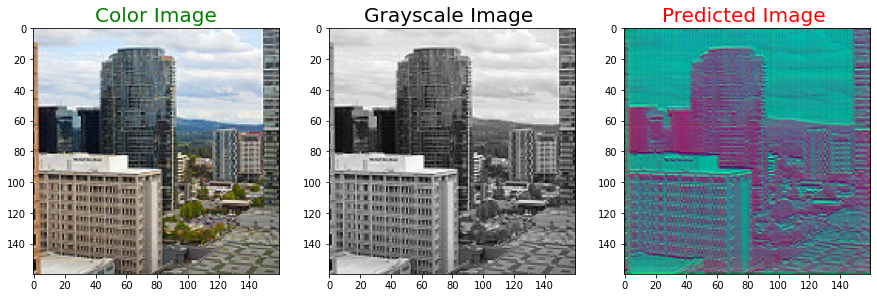

1/1 [==============================] - 0s 27ms/step


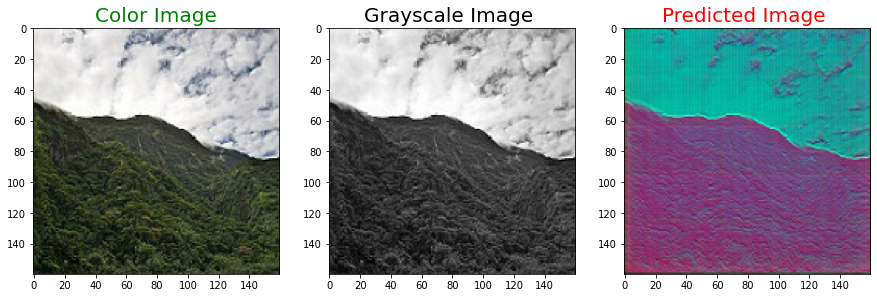

1/1 [==============================] - 0s 25ms/step


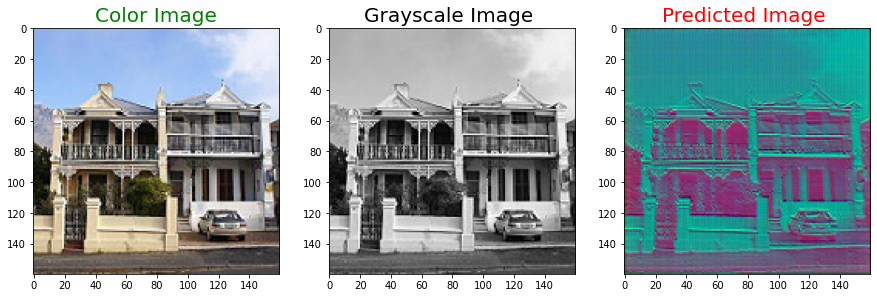

1/1 [==============================] - 0s 25ms/step


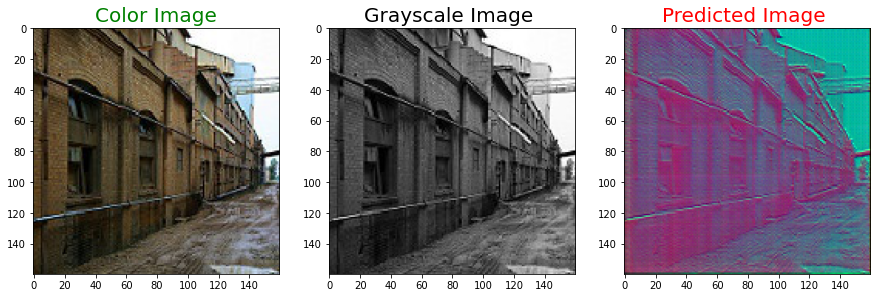

In [ ]:
# defining function to plot images pair
def plot_images(color,grayscale,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

for i in range(6,10):
    predicted = np.clip(model.predict(gray_test[i].reshape(1,160, 160,3)),0.0,1.0).reshape(160, 160,3)
    plot_images(color_test[i],gray_test[i],predicted)